<a href="https://colab.research.google.com/github/RSeth-Creator/Data/blob/dataScience/Multiclass_Classification_WineQuality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Multiclass_Classification_WineQuality**

In [18]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi
import scipy.stats
import warnings

%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [9]:
#Mount the path andload the data to the environment 
data_path="/content/gdrive/MyDrive/Semester_III/DeepLearning/winequality-white.csv"
data = pd.read_csv(data_path,sep=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [11]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


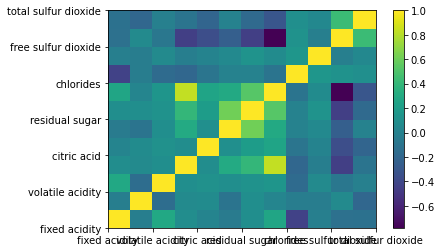

In [13]:
#Pearson correlation matrix
cov_mat = data.corr(method = 'pearson')
fig = plt.figure().add_subplot(111)
plt.pcolor(cov_mat)
plt.colorbar()
fig.set_xticklabels(data.columns)
fig.set_yticklabels(data.columns)
plt.show()

In [27]:
# Add a column 'quality_mark'

low = data[data['quality'] <= 5]
medium = data[(data['quality'] == 6) | (data['quality'] == 7)]
high = data[data['quality'] > 7]
    
low['quality_mark'] = 'low'
medium['quality_mark'] = 'medium'
high['quality_mark'] = 'high'
    
frames = [low, medium, high]
data = pd.concat(frames)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

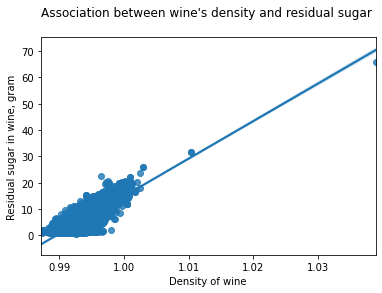

(0.8389664549045835, 0.0)


In [34]:
scat1 = sns.regplot(x = "density", y = "residual sugar", fit_reg = True, data = data)
plt.xlabel("Density of wine")
plt.ylabel("Residual sugar in wine, gram")
plt.title("Association between wine's density and residual sugar \n")
plt.show()

print(scipy.stats.pearsonr(data['density'], data["residual sugar"]))

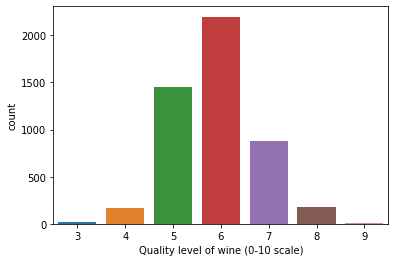

In [36]:
#distribution of quality 

data["quality"] = pd.Categorical(data["quality"])
sns.countplot(x="quality", data=data)
plt.xlabel("Quality level of wine (0-10 scale)")
plt.show()

In [ ]:
#Accuracy checking for models  
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB 
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
#Create a list with required model name 
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
code = {3: 0, 4: 0, 5: 0, 6: 1, 7: 1, 8: 2, 9: 2}
data['quality_c'] = data['quality'].map(code)
features = data[["fixed acidity", 	"volatile acidity", 	"citric acid", 	"residual sugar", 	"chlorides", 	"free sulfur dioxide", 	"total sulfur dioxide", 	"density", 	"pH", 	"sulphates", 	"alcohol", 	"quality"]]
labels = data.quality_c
#Assing the level of cross validation to find the best accuracy
CV = 5  #cross validation number here it os 5 
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])



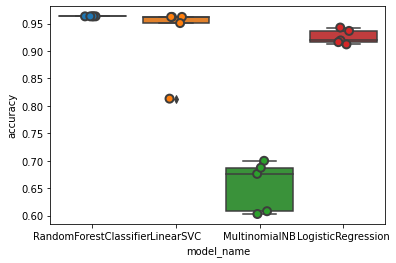

In [52]:
#Showing which model giving the best accuracy
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()


In [53]:

#finding out the accuracy mean for all the classification model 
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.930186
LogisticRegression        0.925475
MultinomialNB             0.654972
RandomForestClassifier    0.963250
Name: accuracy, dtype: float64

In [55]:
#Linear Model SVC 



#Applying SVC to the dataset as it has the highest accuracy
model_svc = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, data.index, test_size=0.33, random_state=0)
model_svc.fit(X_train, y_train)
y_pred = model_svc.predict(X_test)



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [63]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[ 540,    0,    0],
       [   1, 1015,    0],
       [   0,   57,    4]])

In [65]:
from sklearn.metrics import classification_report, accuracy_score
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9641311069882499
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       540
           1       0.95      1.00      0.97      1016
           2       1.00      0.07      0.12        61

    accuracy                           0.96      1617
   macro avg       0.98      0.69      0.70      1617
weighted avg       0.97      0.96      0.95      1617

